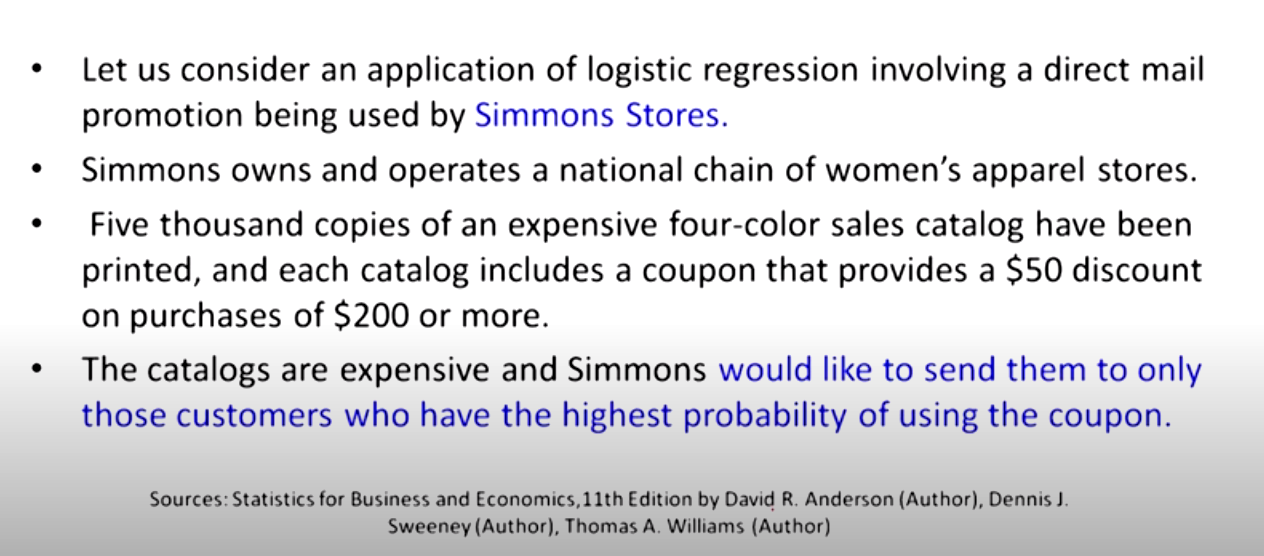

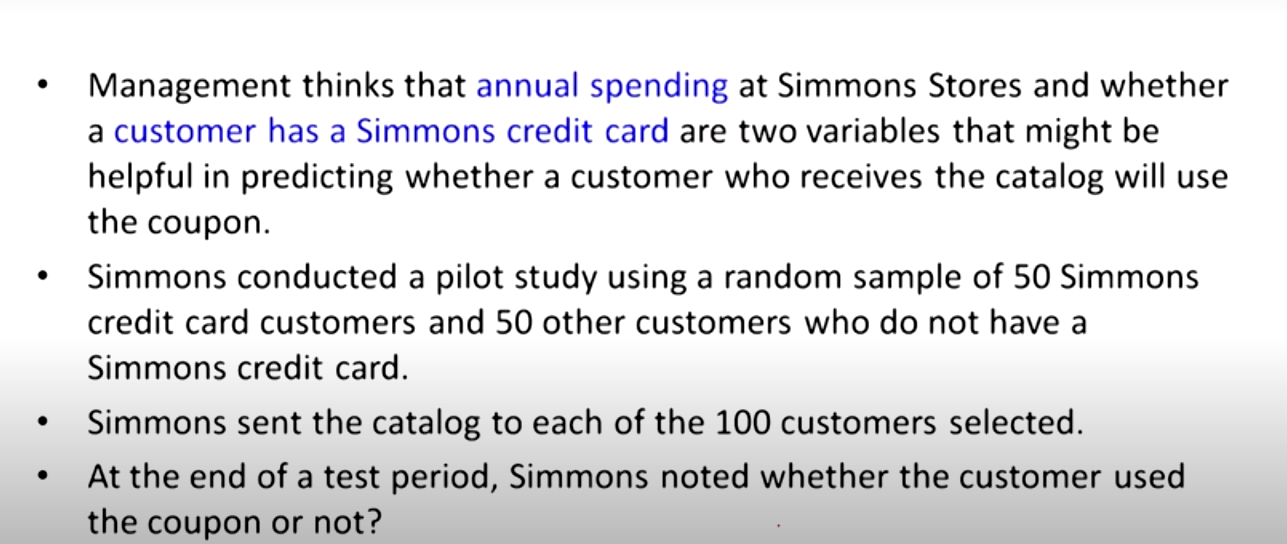

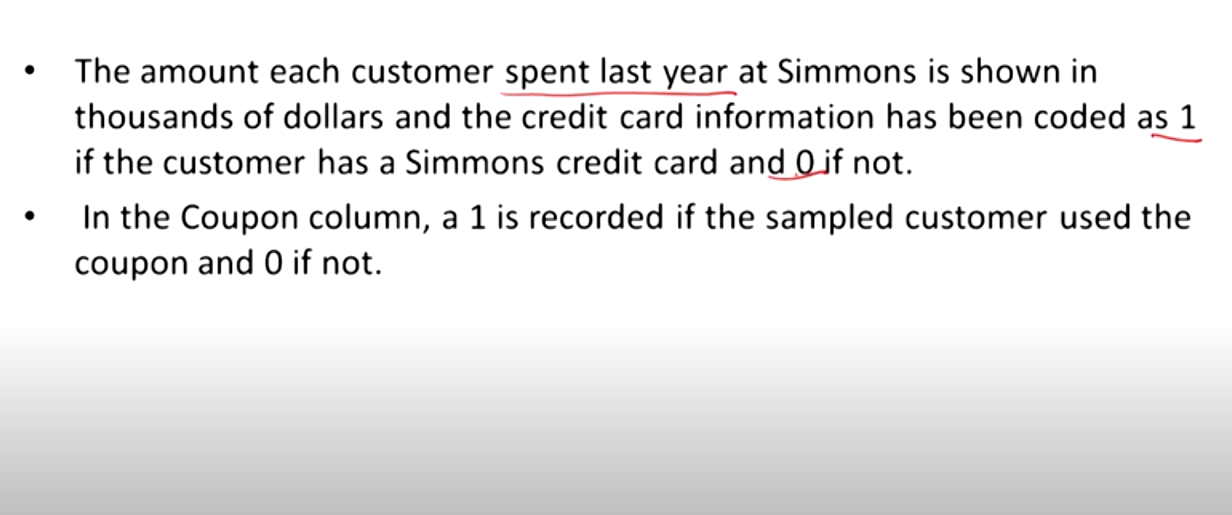

## So we have determine the accuracy of our model and best suited threshold value?

# Solution::

In [122]:
import pandas as pd

In [123]:
dataframe = pd.read_excel("/home/ashish/projects/ConfusionMatrix_ROCcurve_logistic_regression/Simmons2.xls")
dataframe

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [124]:
dataframe.head() ## to get the first five rows

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [125]:
dataframe.describe()  ## it is used to get some statistical details about the data

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


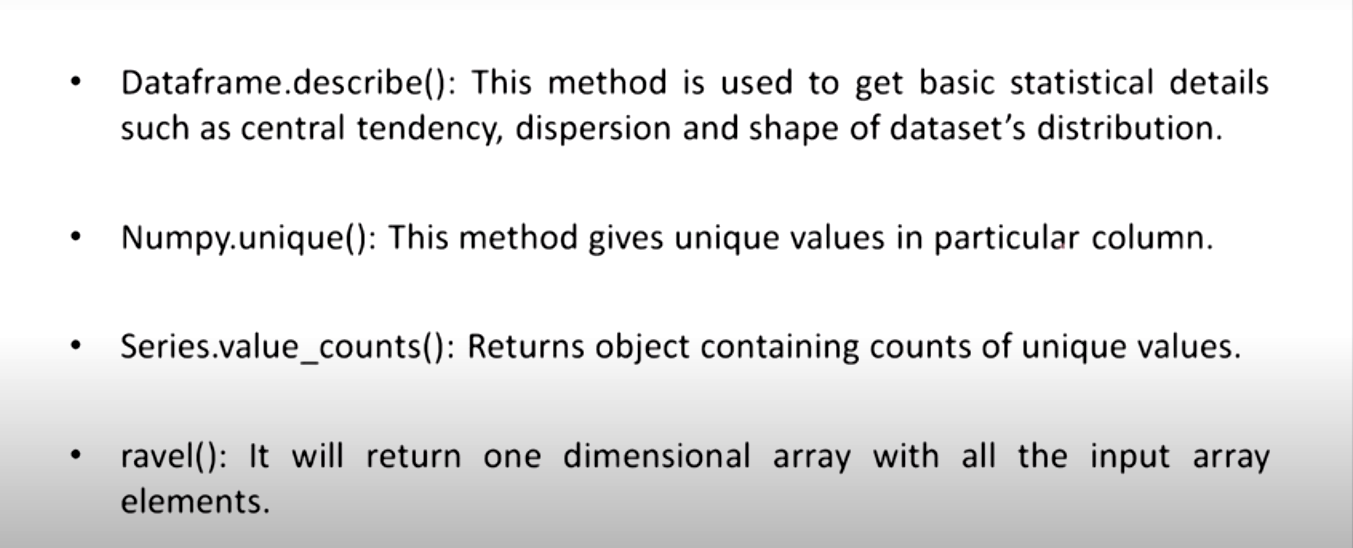

In [126]:
import numpy as np    ## for calling the unique method

dataframe['Coupon'].unique()

array([0, 1])

In [127]:
import pandas    ## for calling the value_counts method
dataframe['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [129]:
card_spend = dataframe[['Card','Spending']]
coup = dataframe['Coupon'].values.reshape(-1,1)
print(card_spend)
print("\n\n",coup)

    Card  Spending
0      1     2.291
1      1     3.215
2      1     2.135
3      0     3.924
4      1     2.528
..   ...       ...
95     0     3.318
96     1     2.421
97     0     6.073
98     1     2.630
99     0     3.411

[100 rows x 2 columns]


 [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [130]:
## Splitting dataset into training and testing sets
x_train,x_test, y_train,y_test = train_test_split(card_spend,coup,test_size=0.25,random_state=42)

In [131]:
## The training dataset for Card and Spending
x_train

,Card,Spending
15,0,6.486
40,0,3.253
96,1,2.421
9,0,3.345
72,1,1.878
...,...,...
60,0,4.721
71,1,2.323
14,0,6.737
92,1,4.959


In [132]:
## The resulting coupon used or not dataset
y_train  ## ravel method used to convert the (75, 1) shape of table to an one dimensional array

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [133]:
## The dataset  which is required to be tested after model development  
x_test

,Card,Spending
83,1,3.995
53,1,3.386
70,1,2.678
45,0,2.118
44,0,3.566
39,0,1.911
22,0,2.118
80,1,5.501
10,1,2.140
0,1,2.291


In [134]:
## THe real result for coupon testing dataset
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [135]:
len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [136]:
log_reg = LogisticRegression(solver='lbfgs').fit(x_train,y_train.ravel())   #### ravel method used to convert the (75, 1) shape of table to an one dimensional array

In [137]:
y_predict_test = log_reg.predict(x_test)
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [138]:
y_predict_train = log_reg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0])

In [139]:
y_prob_train = log_reg.predict_proba(x_train)[:,1]   
y_prob_train

array([0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
       0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
       0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
       0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
       0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
       0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
       0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
       0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
       0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
       0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
       0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
       0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
       0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
       0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
       0.40217015, 0.43807264, 0.50977653, 0.57944626, 0.29042

In [140]:
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

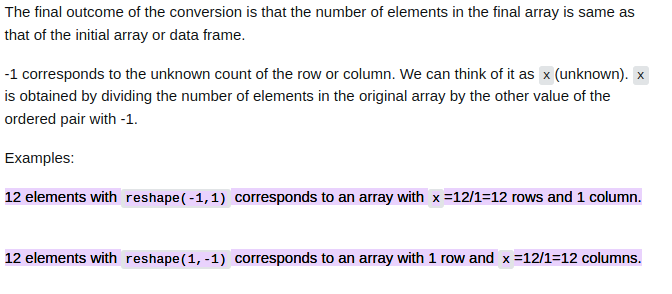

In [141]:
y_prob_test = log_reg.predict_proba(x_test)[:,1]
y_prob_test

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [142]:
y_prob_test.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [143]:
## Developing the model
import statsmodels.api as sm
x = sm.add_constant(card_spend)
logistic_model = sm.Logit(coup,x).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Jan 2022   Pseudo R-squ.:                  0.1012
Time:                        20:26:37   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

In [144]:
## Accuracy Checking And Confusion matrix for test data
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)
score

0.76

## This implies::
    76% of the times our model determines the correct result.

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15,  1],
       [ 5,  4]])

In [146]:
tn,fp,fn,tp  = confusion_matrix(y_test,y_predict).ravel()
print("True Negatives :: ",tn)
print("False Positives :: ",fp)
print("False Negatives :: ",fn)
print("True positives :: ",tp)

True Negatives ::  15
False Positives ::  1
False Negatives ::  5
True positives ::  4


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



## Note::
    1. Recall gives us an idea about when it's actually yes,
    how often does it predict yes.
    
    2. Precison tells us about when it predicts yes, how often 
    it is correct.

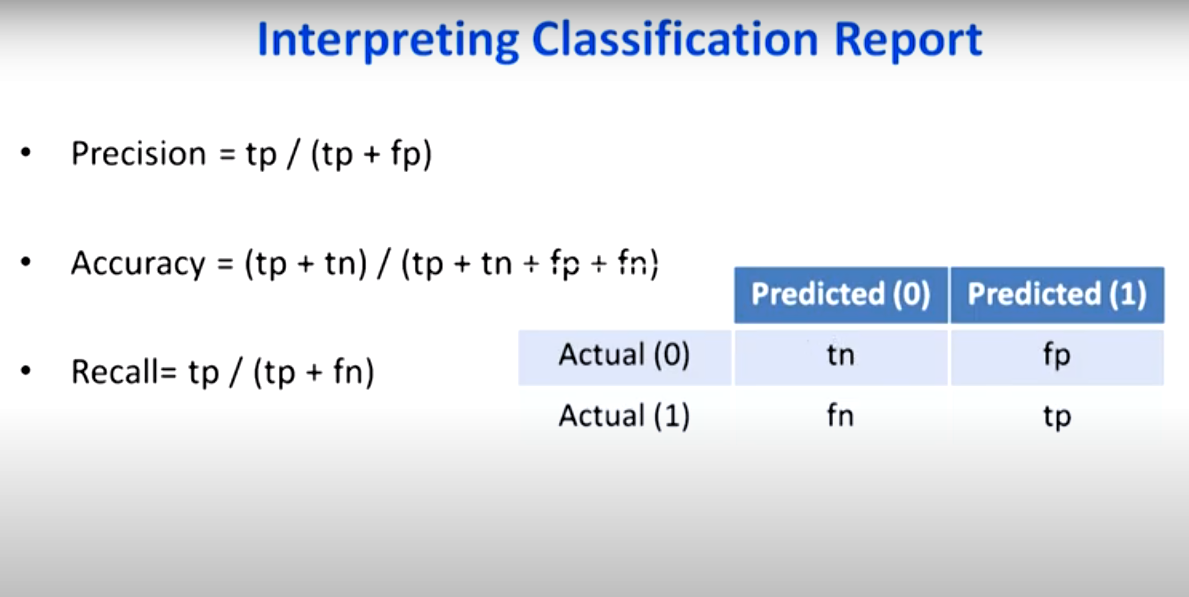